In [1]:
!pip install prometheus-api-client
!pip install reportlab
!pip install pillow
!pip install matplotlib

     |████████████████████████████████| 14.5 MB 371 kB/s eta 0:00:01    |██████████████████▋             | 8.4 MB 211 kB/s eta 0:00:29     |██████████████████████▋         | 10.2 MB 282 kB/s eta 0:00:16
     |████████████████████████████████| 9.5 MB 341 kB/s eta 0:00:01     |████████████████▍               | 4.9 MB 493 kB/s eta 0:00:10     |██████████████████▌             | 5.5 MB 144 kB/s eta 0:00:28
     |████████████████████████████████| 362 kB 156 kB/s eta 0:00:01
     |████████████████████████████████| 510 kB 278 kB/s eta 0:00:01
     |████████████████████████████████| 662 kB 154 kB/s eta 0:00:01
You should consider upgrading via the '/opt/app-root/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.6 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 10.2 MB/s eta 0:00:01
You should consider upgrading via the '/opt/app-root/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/ap

In [7]:
from prometheus_api_client import Metric, MetricsList, PrometheusConnect
from prometheus_api_client.utils import parse_datetime
from datetime import timedelta

import pandas as pd

import os

import matplotlib.pyplot as plt
import matplotlib as mpl

from PIL import Image, ImageFilter
from reportlab.pdfgen import canvas
from reportlab.pdfbase import pdfmetrics

%matplotlib inline

In [3]:
prom_url = "http://prometheus-k8s-openshift-monitoring.apps.ocp4.example.com/"
print("Prometheus uri: ", prom_url)

Prometheus uri:  http://prometheus-k8s-openshift-monitoring.apps.ocp4.example.com/


In [5]:
os.system("oc login -u user1 -p user1")
token = os.popen("oc whoami -t")
r_token = token.read()
print(r_token.rstrip())
pc = PrometheusConnect(url=prom_url, headers={"Authorization": "bearer " + r_token.rstrip()}, disable_ssl=True)

f6xzJZ9G45-bitUwHO8X0F6v89f7wL6gytITEgVS79w


In [9]:
pc.all_metrics()

/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


[':kube_pod_info_node_count:',
 ':node_memory_MemAvailable_bytes:sum',
 'ALERTS',
 'ALERTS_FOR_STATE',
 'aggregator_openapi_v2_regeneration_count',
 'aggregator_openapi_v2_regeneration_duration',
 'aggregator_unavailable_apiservice',
 'aggregator_unavailable_apiservice_count',
 'alertmanager_alerts',
 'alertmanager_alerts_invalid_total',
 'alertmanager_alerts_received_total',
 'alertmanager_build_info',
 'alertmanager_cluster_alive_messages_total',
 'alertmanager_cluster_enabled',
 'alertmanager_cluster_failed_peers',
 'alertmanager_cluster_health_score',
 'alertmanager_cluster_members',
 'alertmanager_cluster_messages_pruned_total',
 'alertmanager_cluster_messages_queued',
 'alertmanager_cluster_messages_received_size_total',
 'alertmanager_cluster_messages_received_total',
 'alertmanager_cluster_messages_sent_size_total',
 'alertmanager_cluster_messages_sent_total',
 'alertmanager_cluster_peer_info',
 'alertmanager_cluster_peers_joined_total',
 'alertmanager_cluster_peers_left_total'

In [21]:
start_time = parse_datetime("1h")
end_time = parse_datetime("now")
chunk_size = timedelta(hours=1)

mem_metric_data = pc.get_metric_range_data(
    "container_memory_rss{namespace='default'}",  # this is the metric name and label config
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

mem_metrics_object_list = MetricsList(mem_metric_data)

print(len(metrics_object_list))
for item in metrics_object_list:
    print(item)
    
mem_metric_object = mem_metrics_object_list[1] # one of the metrics from the list
print(type(my_metric_object))

mem_metric_object_chunk_list = []
for raw_metric in mem_metric_data:
    metric_object_chunk_list.append(Metric(raw_metric))

print(my_metric_object.metric_values)

/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


5
{
metric_name: 'container_memory_rss'
label_config: {'container': 'POD', 'endpoint': 'https-metrics', 'id': '/kubepods.slice/kubepods-besteffort.slice/kubepods-besteffort-pod26e36c71_bedc_4912_8751_5935fab70439.slice/crio-72184537146c741f616af7d794ef30bfb614e973894e712c564d766da23f5991.scope', 'image': 'quay.io/openshift-release-dev/ocp-v4.0-art-dev@sha256:636ba95d1f2717a876ab2cb1b09ac9b40739db00d26b5cdb9c3a7d6114b75494', 'instance': '192.168.20.161:10250', 'job': 'kubelet', 'metrics_path': '/metrics/cadvisor', 'name': 'k8s_POD_minimal-notebook-65f5cffcd5-bt9x8_default_26e36c71-bedc-4912-8751-5935fab70439_0', 'namespace': 'default', 'node': 'worker0.ocp4.example.com', 'pod': 'minimal-notebook-65f5cffcd5-bt9x8', 'service': 'kubelet'}
metric_values:                                ds        y
0   2020-10-21 04:55:32.128999949  4214784
1   2020-10-21 04:55:59.559999943  4214784
2   2020-10-21 04:56:27.992000103  4214784
3   2020-10-21 04:56:44.750000000  4214784
4   2020-10-21 04:57:25.9

/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [26]:
cpu_metric_data = pc.get_metric_range_data(
    "namespace:container_cpu_usage:sum{namespace='default'}",  # this is the metric name and label config
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)
cpu_metrics_object_list = MetricsList(cpu_metric_data)
    
cpu_metric_object = cpu_metrics_object_list[0] # one of the metrics from the list
print(type(my_metric_object2))

cpu_metric_object_chunk_list = []
for raw_metric in cpu_metric_data:
    cpu_metric_object_chunk_list.append(Metric(raw_metric))


<class 'prometheus_api_client.metric.Metric'>


/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [27]:
print(cpu_metric_object.metric_values.y)

0      0.000094
1      0.000122
2      0.000106
3      0.000123
4      0.000119
         ...   
115    0.006197
116    0.006375
117    0.006356
118    0.006413
119    0.006553
Name: y, Length: 120, dtype: float64


In [64]:
network_metric_data = pc.get_metric_range_data(
    "container_network_transmit_bytes_total{namespace='default'}",  # this is the metric name and label config
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)
network_metrics_object_list = MetricsList(network_metric_data)
    
network_metric_object = network_metrics_object_list[1] # one of the metrics from the list
print(type(network_metric_objcpu_metric_objectect))

network_metric_object_chunk_list = []
for raw_metric in network_metric_data:
    network_metric_object_chunk_list.append(Metric(raw_metric))
print(network_metric_object.metric_values.y)

/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


<class 'prometheus_api_client.metric.Metric'>
0      1076
1      1076
2      1076
3      1076
4      1076
       ... 
115    1216
116    1216
117    1216
118    1216
119    1216
Name: y, Length: 120, dtype: int64


/opt/app-root/lib/python3.6/site-packages/urllib3/connectionpool.py:988: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prometheus-k8s-openshift-monitoring.apps.ocp4.example.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [65]:
print(cpu_metric_object.metric_values)
print(type(cpu_metric_object.metric_values))
print(type(cpu_metric_object.metric_values.ds))
print(type(cpu_metric_object.metric_values.y))

                               ds         y
0   2020-10-21 05:03:06.661999941  0.000094
1   2020-10-21 05:03:36.661999941  0.000122
2   2020-10-21 05:04:06.661999941  0.000106
3   2020-10-21 05:04:36.661999941  0.000123
4   2020-10-21 05:05:06.661999941  0.000119
..                            ...       ...
115 2020-10-21 06:00:36.661999941  0.006197
116 2020-10-21 06:01:06.661999941  0.006375
117 2020-10-21 06:01:36.661999941  0.006356
118 2020-10-21 06:02:06.661999941  0.006413
119 2020-10-21 06:02:36.661999941  0.006553

[120 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [70]:
test_data = cpu_metric_object.metric_values

In [146]:
import numpy as np

In [87]:
df = pd.DataFrame(test_data, columns = ['ds', 'y'])
df = df.rename(columns={'y':'cpu'})

In [88]:
df['mem'] = mem_metric_object.metric_values.y

In [91]:
df['network'] = network_metric_object.metric_values.y

In [92]:
df

,ds,cpu,mem,network
0,2020-10-21 05:03:06.661999941,0.000094,6324224,1076
1,2020-10-21 05:03:36.661999941,0.000122,6324224,1076
2,2020-10-21 05:04:06.661999941,0.000106,6324224,1076
3,2020-10-21 05:04:36.661999941,0.000123,6324224,1076
4,2020-10-21 05:05:06.661999941,0.000119,6324224,1076
...,...,...,...,...
115,2020-10-21 06:00:36.661999941,0.006197,6324224,1216
116,2020-10-21 06:01:06.661999941,0.006375,6324224,1216
117,2020-10-21 06:01:36.661999941,0.006356,6324224,1216
118,2020-10-21 06:02:06.661999941,0.006413,6324224,1216


In [94]:
type(df['ds'])

pandas.core.series.Series

In [117]:
len(df['ds'][df['ds'].dt.day == 21])

120

In [135]:
df['datetime'] = pd.to_datetime(df['ds'])
df.head()

,ds,cpu,mem,network,datetime
0,2020-10-21 05:03:06.661999941,0.000094,6324224,1076,2020-10-21 05:03:06.661999941
1,2020-10-21 05:03:36.661999941,0.000122,6324224,1076,2020-10-21 05:03:36.661999941
2,2020-10-21 05:04:06.661999941,0.000106,6324224,1076,2020-10-21 05:04:06.661999941
3,2020-10-21 05:04:36.661999941,0.000123,6324224,1076,2020-10-21 05:04:36.661999941
4,2020-10-21 05:05:06.661999941,0.000119,6324224,1076,2020-10-21 05:05:06.661999941


In [151]:
df['day'] = df['datetime'].dt.day

In [152]:
df.head()

,ds,cpu,mem,network,datetime,day
0,2020-10-21 05:03:06.661999941,0.000094,6324224,1076,2020-10-21 05:03:06.661999941,21
1,2020-10-21 05:03:36.661999941,0.000122,6324224,1076,2020-10-21 05:03:36.661999941,21
2,2020-10-21 05:04:06.661999941,0.000106,6324224,1076,2020-10-21 05:04:06.661999941,21
3,2020-10-21 05:04:36.661999941,0.000123,6324224,1076,2020-10-21 05:04:36.661999941,21
4,2020-10-21 05:05:06.661999941,0.000119,6324224,1076,2020-10-21 05:05:06.661999941,21


In [155]:
table_day = pd.pivot_table(df, values = ['cpu', 'mem', 'network'], index=['day'], aggfunc = np.mean) ## problem 1

In [156]:
table_day

,cpu,mem,network
day,,,
21,0.014898,6324224,1130.833333


In [174]:
table_day.loc[21] 

cpu        1.489817e-02
mem        6.324224e+06
network    1.130833e+03
Name: 21, dtype: float64

In [182]:
# dt.week is dt.weekofyear
df['weekly'] = df['datetime'].dt.week % 10 ## problem 2 

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [183]:
df

,ds,cpu,mem,network,datetime,day,week,weekly
0,2020-10-21 05:03:06.661999941,0.000094,6324224,1076,2020-10-21 05:03:06.661999941,21,3,3
1,2020-10-21 05:03:36.661999941,0.000122,6324224,1076,2020-10-21 05:03:36.661999941,21,3,3
2,2020-10-21 05:04:06.661999941,0.000106,6324224,1076,2020-10-21 05:04:06.661999941,21,3,3
3,2020-10-21 05:04:36.661999941,0.000123,6324224,1076,2020-10-21 05:04:36.661999941,21,3,3
4,2020-10-21 05:05:06.661999941,0.000119,6324224,1076,2020-10-21 05:05:06.661999941,21,3,3
...,...,...,...,...,...,...,...,...
115,2020-10-21 06:00:36.661999941,0.006197,6324224,1216,2020-10-21 06:00:36.661999941,21,3,3
116,2020-10-21 06:01:06.661999941,0.006375,6324224,1216,2020-10-21 06:01:06.661999941,21,3,3
117,2020-10-21 06:01:36.661999941,0.006356,6324224,1216,2020-10-21 06:01:36.661999941,21,3,3
118,2020-10-21 06:02:06.661999941,0.006413,6324224,1216,2020-10-21 06:02:06.661999941,21,3,3


In [185]:
# grouping weekly mean 
table_weekly = pd.pivot_table(df, values = ['cpu', 'mem', 'network'], index=['weekly'], aggfunc = np.mean)

In [186]:
table_weekly

,cpu,mem,network
weekly,,,
3,0.014898,6324224,1130.833333


In [191]:
# generate fake metric data in dictionary(python data architecture)
fake_metric_data = {
    'weekly': [1,2,4],
    'cpu': [0.12, 0.17, 0.19],
    'mem': [5555555, 7513246, 8646534],
    'network': [1111.8321, 1332.8321, 1556.8321]
}

In [192]:
# generate the fake metric dataframe
fake_metric_df = pd.DataFrame(fake_metric_data)

In [253]:
fake_metric_df

,cpu,mem,network
weekly,,,
1,0.12,5555555,1111.8321
2,0.17,7513246,1332.8321
4,0.19,8646534,1556.8321


In [255]:
fake_metric_df['cpu'][1]

0.12

In [197]:
# Set index weekly because origin dataframe's index is weekly
fake_metric_df = fake_metric_df.set_index('weekly')
fake_metric_df

,cpu,mem,network
weekly,,,
1,0.12,5555555,1111.8321
2,0.17,7513246,1332.8321
4,0.19,8646534,1556.8321


In [198]:
gen_weekly_data = table_weekly.append(fake_metric_df)

In [201]:
gen_weekly_data = gen_weekly_data.sort_index()
gen_weekly_data

,cpu,mem,network
weekly,,,
1,0.120000,5555555,1111.832100
2,0.170000,7513246,1332.832100
3,0.014898,6324224,1130.833333
4,0.190000,8646534,1556.832100


In [301]:
print(gen_weekly_data["cpu"].values.tolist(), gen_weekly_data["mem"].values.tolist(), gen_weekly_data["network"].values.tolist())

[0.12, 0.17, 0.014898167837095364, 0.19] [5555555, 7513246, 6324224, 8646534] [1111.8321, 1332.8321, 1130.8333333333333, 1556.8321]


In [315]:
cpu_data = gen_weekly_data["cpu"].values.tolist()
print(cpu_data)

[0.12, 0.17, 0.014898167837095364, 0.19]


In [47]:
fileName = 'pdfTable.pdf'
from reportlab.platypus import SimpleDocTemplate
from reportlab.lib.pagesizes import letter

from reportlab.graphics.shapes import Drawing
from reportlab.lib import colors
from reportlab.platypus import Table
from reportlab.graphics.shapes import String

from reportlab.graphics.charts.linecharts import(
	HorizontalLineChart
)

pdf = SimpleDocTemplate(fileName,pagesize=letter)

In [206]:
from reportlab.graphics.charts.linecharts import(
	HorizontalLineChart
)

def getLineChart(dataframe):
	chart = HorizontalLineChart()
	chart.data = dataframe['mem']
	chart.x = 5
	chart.y = 5
	chart.height = 100
	chart.width = 240

	#chart.categoryAxis.categoryNames = my_metric_object.metric_values.ds

	title = String(
		50, 110, 
		'CPU Line Chart', 
		fontSize = 14
	)	

	chart.valueAxis.valueMin = 0
	chart.valueAxis.valueMax = 10
	chart.valueAxis.valueStep = 2

	chart.lines[0].strokeWidth = 3.5
	chart.lines[1].strokeWidth = 1
	chart.lines[0].strokeColor = colors.pink

	drawing = Drawing(240, 120)
	drawing.add(title)
	drawing.add(chart)

	return drawing

In [207]:
lineChart = getLineChart(gen_weekly_data)
table = Table([
	[lineChart]
], 270, 150)

In [208]:
table.setStyle([
	('INNERGRID',(0,0),(-1,-1),1,colors.black),
	("VALIGN",(0,0),(-1,-1),"CENTER"),
    ("ALIGN",(0,0),(-1,-1),"CENTER"),	
])

In [209]:
elems = []
elems.append(table)
pdf.build(elems)

TypeError: object of type 'int' has no len()

In [405]:
cpu = my_metric_object.metric_values.y[my_metric_object.metric_values.y.size-1]
mem = my_metric_object2.metric_values.y[my_metric_object2.metric_values.y.size-1]
net = my_metric_object3.metric_values.y[my_metric_object3.metric_values.y.size-1]
print(cpu)
print(mem)
print(net)
total = cpu/1000+mem*10000+net
print(round(total))

6324224
0.004676097428988426
1146
7517


In [211]:


# Set the variable
cpu_result_cost = cpu_metric_object.metric_values.y[cpu_metric_object.metric_values.y.size - 1]
mem_result_cost = mem_metric_object.metric_values.y[mem_metric_object.metric_values.y.size - 1]
network_reulst_cost = network_metric_object.metric_values.y[network_metric_object.metric_values.y.size-1]

# Create the PDF File (name is cost.pdf)
c = canvas.Canvas("cost.pdf")

# Set the character font & size
c.setFont("Helvetica", 18)

# Draw the PDF Title
c.drawString(220, 700, "000 Cloud Bill Report")

# Calculate the Usage Cost
c.drawString(100, 660, "Cpu Usage Cost : " + str(cpu_result_cost) + "won")
c.drawString(100, 640, "Mem Usage Cost : " + str(mem_result_cost) + "won")
c.drawString(100, 620, "Net Usage Cost : " + str(network_reulst_cost) + "won")

# Calculate The total Cost
total = (cpu_result_cost + mem_result_cost + network_reulst_cost) * 3

c.drawString(100, 600, "total cost : " + str(total) + "won")


# (0,0) = left,bottom
c.drawImage('logo.png', x=380, y=50, width=160, height=90)
c.save()

In [210]:
from reportlab.pdfgen import canvas
import datetime

# 시간 정의
now = datetime.datetime.now()
month = now.strftime("%m")
day = now.strftime("%d")

# 리소스 정의
cpu = my_metric_object.metric_values.y[my_metric_object.metric_values.y.size-1]
mem = my_metric_object2.metric_values.y[my_metric_object2.metric_values.y.size-1]
net = my_metric_object3.metric_values.y[my_metric_object3.metric_values.y.size-1]
total = cpu*1000+mem*1000+net*1000



# 폰트 변경 및 크기 조정
c.setFont("Helvetica", 18)
# 빈 pdf 파일 생성
c = canvas.Canvas(str(month)+"월 클라우드 사용 고지서.pdf")
# 제목
c.drawString(280,750,str(month)+"월 클라우드 사용 고지서")
# 선형 그래프

# 표

# 원형 그래프
c.drawString(x,y,"< 사용량에 따른 가격 분포(%) >")

# 가격 산정 제목
 c.drawString(x,y,"< price calculation method by resource usage >")
# CPU 가격 산정 방식
c.drawString(x,y,"CPU: 컨테이너 cpu 사용량 합계 0.1 "+str(cpu)+"X 1000 원")
# Memory 가격 산정 방식
c.drawString(x,y,"Memory: container memory RSS"+str(mem)+"X 1000 원")
# Network 가격 산정 방식
c.drawString(x,y,"Network: 컨테이너 네트워크 총 전송 1byte"+str(net)+"X 1000 원")
# 총 사용 비용
c.drawString(x,y,str(month)+"총 사용 비용 "+str(total)+"원")
# 로고 그리기
c.drawImage('logo.png', x=380, y=50, width=160, height=90)
# 저장
c.save()


IndentationError: unexpected indent (<ipython-input-210-7f8ece8e46c3>, line 31)

[(0.12, 0.17, 0.014898167837095364, 0.19)] [(5555555, 7513246, 6324224, 8646534)] [(1111.8321, 1332.8321, 1130.8333333333333, 1556.8321)]


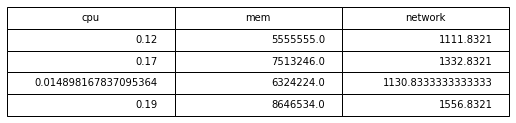

In [446]:
fileName = 'graph.pdf'
from reportlab.platypus import SimpleDocTemplate
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas 


import datetime
import calendar


# 시간 정의
now = datetime.datetime.today()
month = calendar.month_name[now.month]


pdf = SimpleDocTemplate(fileName,pagesize=letter)
c = canvas.Canvas("pdfTable.pdf") 


from reportlab.graphics.shapes import Drawing
from reportlab.lib import colors
from reportlab.platypus import Table
from reportlab.graphics.shapes import String


from reportlab.graphics.charts.piecharts import (
	Pie
)
from reportlab.graphics.charts.legends import (
	Legend
)
from reportlab.lib.validators import Auto

def getPieChart():
	data = [6553, 6324, 1216]

	chart = Pie()
	chart.data = data
	chart.x = 50
	chart.y = 5

	chart.labels = ['cpu_cost','mem_cost','net_cost']

	chart.sideLabels = True

	chart.slices[0].fillColor = colors.red
	#chart.slices[0].popout = 8

	title = String(
		50, 110, 
		'Cost ratio', 
		fontSize = 12
	)	

	legend = Legend()
	legend.x = 220
	legend.y = 80
	legend.alignment = 'right' 	

	legend.colorNamePairs = Auto(obj=chart)

	drawing = Drawing(0, 500)
	drawing.add(title)
	drawing.add(chart)
	drawing.add(legend)

	return drawing

from reportlab.graphics.charts.linecharts import(
	HorizontalLineChart
)
#cpu line chart
def getLineChart(title, data, data_max):
	chart = HorizontalLineChart()
	chart.data = data
	chart.x = 5
	chart.y = 5
	chart.height = 100
	chart.width = 150

	chart.categoryAxis.categoryNames = [
		'week_1', 'week_2', 'week_3', 'week_4'
	]

	title = String(
		35, 120, 
		title +' usage per week', 
		fontSize = 12
	)	
#cpu y axis range
	chart.valueAxis.valueMin = 0
	chart.valueAxis.valueMax = data_max
	chart.valueAxis.valueStep = round(data_max,2)/5
	chart.lines[0].strokeWidth = 3.5
	chart.lines[0].strokeColor = colors.purple

	drawing = Drawing(170, 450) 
	drawing.add(title)
	drawing.add(chart)
	return drawing

def get_table(dataframe):
    table_fig = plt.figure(figsize=(9,2))
    ax = plt.subplot(111)
    ax.axis('off')
    ax.table(cellText=dataframe.values, colLabels=dataframe.columns, bbox=[0,0,1,1])
    return table_fig

pieChart = getPieChart()
#create new function to each line chart
cpu_title = 'cpu'
mem_title = 'mem'
net_title = 'net'

cpu_data = [tuple(x for x in gen_weekly_data["cpu"].values.tolist())]
mem_data = [tuple(x for x in gen_weekly_data["mem"].values.tolist())]
net_data = [tuple(x for x in gen_weekly_data["network"].values.tolist())]

print(cpu_data, mem_data,net_data)

cpu_max = max(cpu_data[0])
mem_max = max(mem_data[0])
net_max = max(net_data[0])

cpu_lineChart = getLineChart(cpu_title, cpu_data, cpu_max)
mem_lineChart = getLineChart(mem_title, mem_data, mem_max)
net_lineChart = getLineChart(net_title, net_data, net_max)

dataframe_fig = get_table(gen_weekly_data)

dataframe_fig.savefig('test.png')

#chart 위치
table = Table([
	[cpu_lineChart,mem_lineChart,net_lineChart]
], 190, 200)

pie_table = Table([
	[pieChart]
], 550, 350)

table.setStyle([
	#('INNERGRID',(0,0),(-1,-1),1,colors.white),
	("VALIGN",(0,0),(-1,-1),"BOTTOM"),
    ("ALIGN",(0,0),(-1,-1),"CENTER"),	
])


df_fig.setStyle([
	#('INNERGRID',(0,0),(-1,-1),1,colors.white),
	("VALIGN",(0,0),(-1,-1),"BOTTOM"),
    ("ALIGN",(0,0),(-1,-1),"CENTER"),	
])

pie_table.setStyle([
	('INNERGRID',(0,0),(-1,-1),1,colors.transparent),
	("VALIGN",(0,0),(-1,-1),"BOTTOM"),
    ("ALIGN",(0,0),(-1,-1),"LEFT"),	
])

elems = []
elems.extend([table, pie_table])
pdf.build(elems)


In [435]:
type(dataframe_fig)
type(pieChart)

reportlab.graphics.shapes.Drawing

In [447]:
from PyPDF2 import PdfFileWriter, PdfFileReader
import io
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
import datetime
import calendar

# 시간 정의
now = datetime.datetime.today()
month = calendar.month_name[now.month]

packet = io.BytesIO()
# create a new PDF with Reportlab
can = canvas.Canvas(packet, pagesize=letter)
# 제목
can.setFont('Helvetica', 20)
can.drawString(200,725,month+" Cloud Usage Bill")
# 가격 산정 제목
can.setFont('Helvetica', 18)
can.drawString(330,270,"< Price Calculation Method >")

can.setFont('Helvetica', 9)
# CPU 가격 산정 방식
can.drawString(350,240,"CPU: sum of container cpu usage, dollar per 0.1")
# Memory 가격 산정 방식
can.drawString(350,220,"Memory: container memory RSS, dollar per MB")
# Network 가격 산정 방식
can.drawString(350,200,"Network: container network transmit bytes total, dollar per MB")

can.setFont('Helvetica', 18)
can.drawString(350,100,"total cost :  " )

#draw image
can.drawImage('logo.png', x=450, y=10, width=90, height=60)
can.drawImage('test.png', x=-20, y=300, width=648, height=144)
can.save()

#move to the beginning of the StringIO buffer
packet.seek(0)
new_pdf = PdfFileReader(packet)
# read your existing PDF
existing_pdf = PdfFileReader(open("graph.pdf", "rb"))
output = PdfFileWriter()
# add the "watermark" (which is the new pdf) on the existing page
page = existing_pdf.getPage(0)
page.mergePage(new_pdf.getPage(0))
output.addPage(page)
# finally, write "output" to a real file
outputStream = open(month+" Cloud Usage Bill.pdf", "wb")
output.write(outputStream)
outputStream.close()